# Análise Estatística de Dados - Reclamações ANATEL

<h3>1) Importando Bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h3>2) Visualizando os dados

2.1) Carregamento dos dados

In [16]:
df = pd.read_csv('reclamacoes.csv',sep = ";")#Nome do arquivo do CSV

2.2) Substituindo brancos para NaN

In [17]:
# Substituir valores vazios representados por strings "  " por NaN
df.replace("  ", np.nan, inplace=True)
df.replace("       ", np.nan, inplace=True)

<h3> 3) Visualização inicial e entendimento da estrutura do dataset

In [18]:
print("Visualização inicial:")
print(df.head())

Visualização inicial:
  DataExtracao  SOLICITAÇÕES   Ano  Mês   AnoMês  UF      Cidade CO_MUNICIPIO  \
0   2018-04-23             1  2015    1  2015-01  DF    Brasília      5300108   
1   2018-04-23             1  2015    1  2015-01  AC  Rio Branco      1200401   
2   2018-04-23             1  2015    1  2015-01  AL      Maceió      2704302   
3   2018-04-23             1  2015    1  2015-01  AM      Manaus      1302603   
4   2018-04-23             1  2015    1  2015-01  AM      Manaus      1302603   

   CanalEntrada       Condição       TipoAtendimento  Serviço   Marca  \
0           SIC  Reencaminhada  Pedido de Informação   Outros  Outros   
1  Fale Conosco           Nova            Reclamação     STFC      OI   
2  Fale Conosco           Nova            Reclamação  SMP_Pós    VIVO   
3  Fale Conosco  Reencaminhada            Reclamação  SMP_Pré    VIVO   
4  Fale Conosco           Nova            Reclamação     STFC      OI   

                                             Assunto

In [19]:
print("\nInfo geral:")
df.info()


Info geral:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15952407 entries, 0 to 15952406
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   DataExtracao     object
 1   SOLICITAÇÕES     int64 
 2   Ano              int64 
 3   Mês              int64 
 4   AnoMês           object
 5   UF               object
 6   Cidade           object
 7   CO_MUNICIPIO     object
 8   CanalEntrada     object
 9   Condição         object
 10  TipoAtendimento  object
 11  Serviço          object
 12  Marca            object
 13  Assunto          object
 14  Problema         object
dtypes: int64(3), object(12)
memory usage: 1.8+ GB


In [20]:
print("\nDados faltantes:")
print(df.isnull().sum())


Dados faltantes:
DataExtracao           0
SOLICITAÇÕES           0
Ano                    0
Mês                    0
AnoMês                 0
UF                 48334
Cidade             49897
CO_MUNICIPIO       50623
CanalEntrada           0
Condição               0
TipoAtendimento        0
Serviço                3
Marca                  3
Assunto                0
Problema               0
dtype: int64


<h3>4) Identificar variáveis qualitativas (categóricas) e quantitativas (numéricas)

4.1) Filtrando as colunas

In [21]:
df = df.drop(columns=['AnoMes', 'CO_MUNICIPIO'], errors='ignore') #ignorando as colunas AnoMes e CO_Municipio pois sao informações nao necessarias
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

4.2) Classificando as colunas

In [22]:
print("\nColunas qualitativas (categóricas):")
print(colunas_categoricas)

print("\nColunas quantitativas (numéricas):")
print(colunas_numericas)


Colunas qualitativas (categóricas):
['DataExtracao', 'AnoMês', 'UF', 'Cidade', 'CanalEntrada', 'Condição', 'TipoAtendimento', 'Serviço', 'Marca', 'Assunto', 'Problema']

Colunas quantitativas (numéricas):
['SOLICITAÇÕES', 'Ano', 'Mês']


<h3> 5) Estatística descritiva

In [23]:
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))


Estatísticas descritivas:
       DataExtracao  SOLICITAÇÕES           Ano           Mês    AnoMês  \
count      15952407  1.595241e+07  1.595241e+07  1.595241e+07  15952407   
unique            6           NaN           NaN           NaN        65   
top      2018-04-23           NaN           NaN           NaN   2015-07   
freq        6387671           NaN           NaN           NaN    342906   
mean            NaN  1.179345e+00  2.017036e+03  6.210646e+00       NaN   
std             NaN  1.032615e+00  1.565117e+00  3.418766e+00       NaN   
min             NaN  1.000000e+00  2.015000e+03  1.000000e+00       NaN   
25%             NaN  1.000000e+00  2.016000e+03  3.000000e+00       NaN   
50%             NaN  1.000000e+00  2.017000e+03  6.000000e+00       NaN   
75%             NaN  1.000000e+00  2.018000e+03  9.000000e+00       NaN   
max             NaN  1.690000e+02  2.020000e+03  1.200000e+01       NaN   

              UF     Cidade CanalEntrada  Condição TipoAtendimento   Ser

<h3>6) Frequências de variáveis categóricas

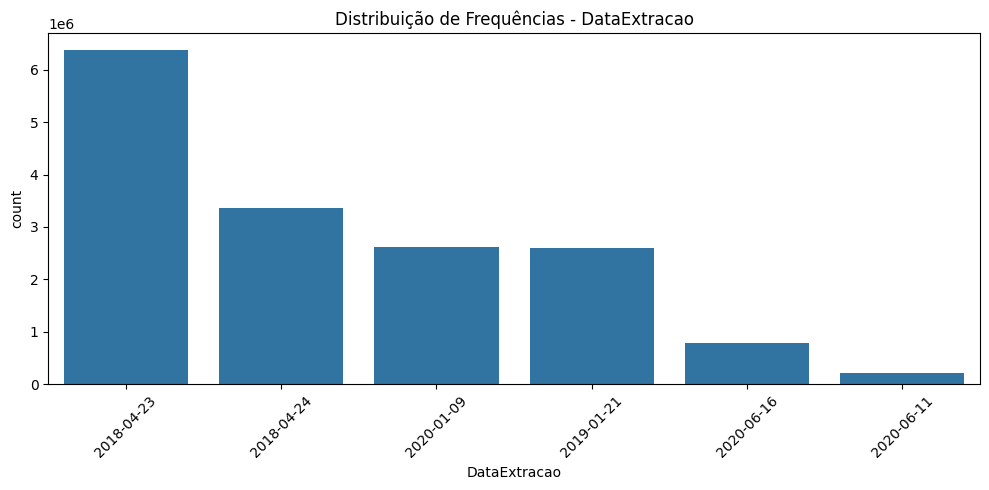

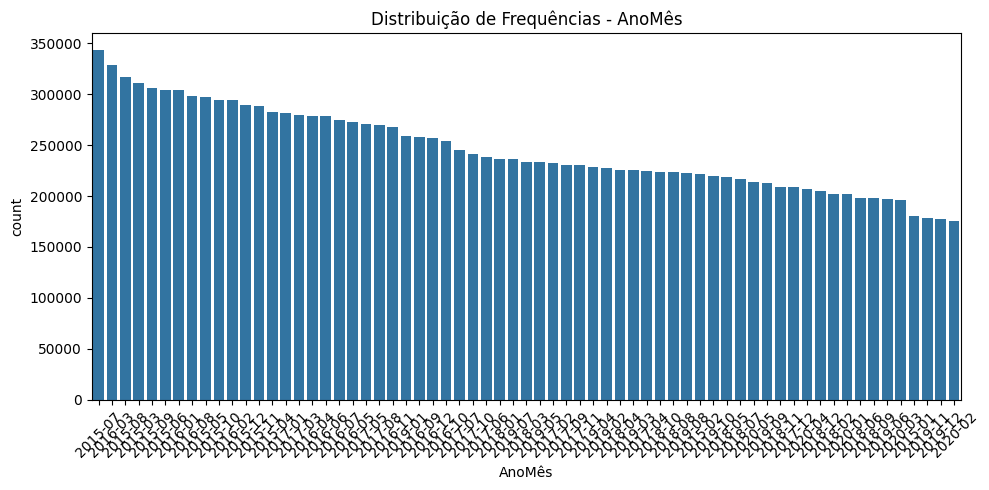

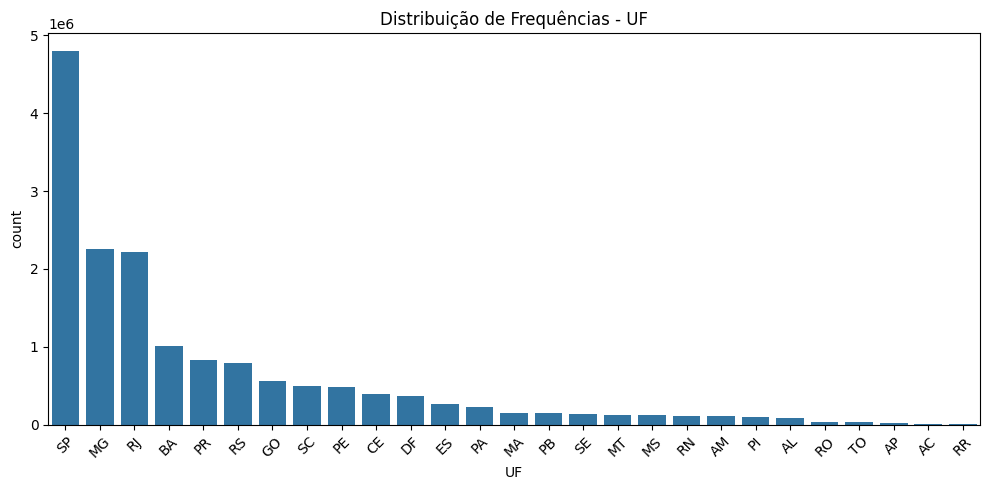

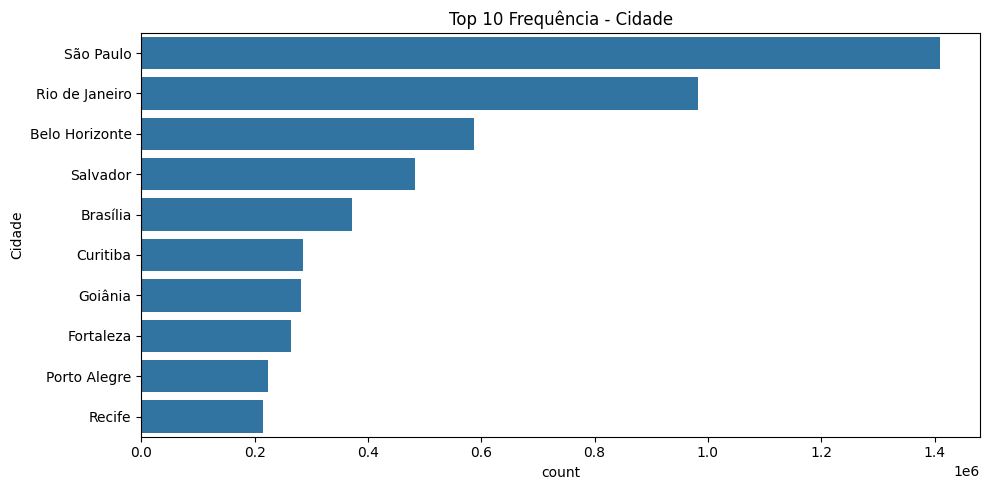

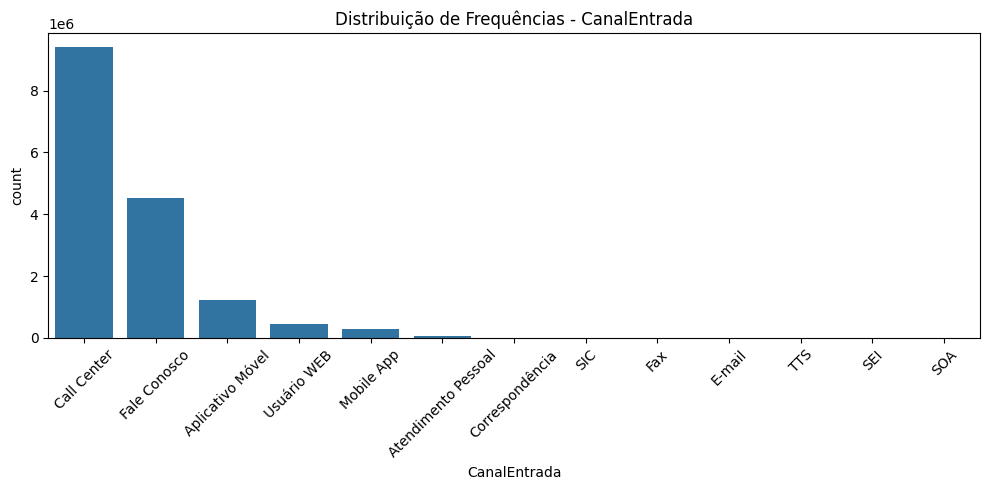

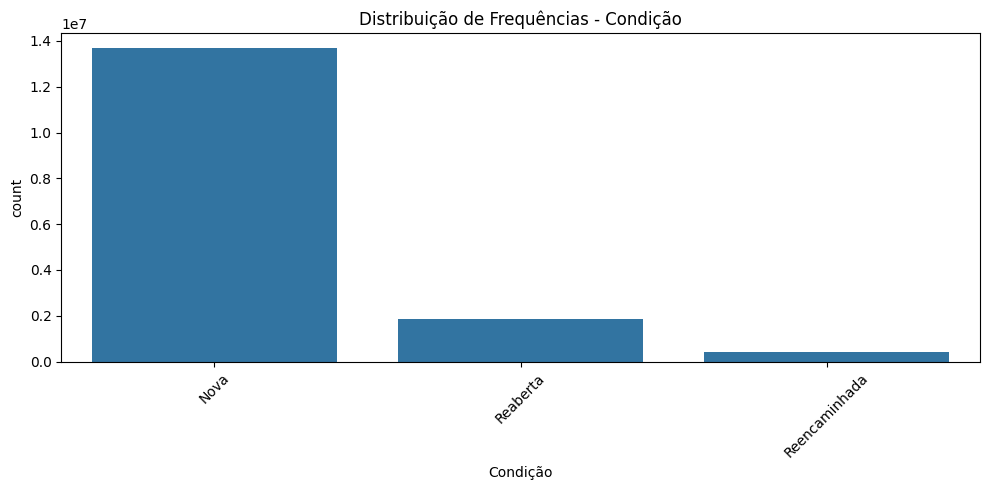

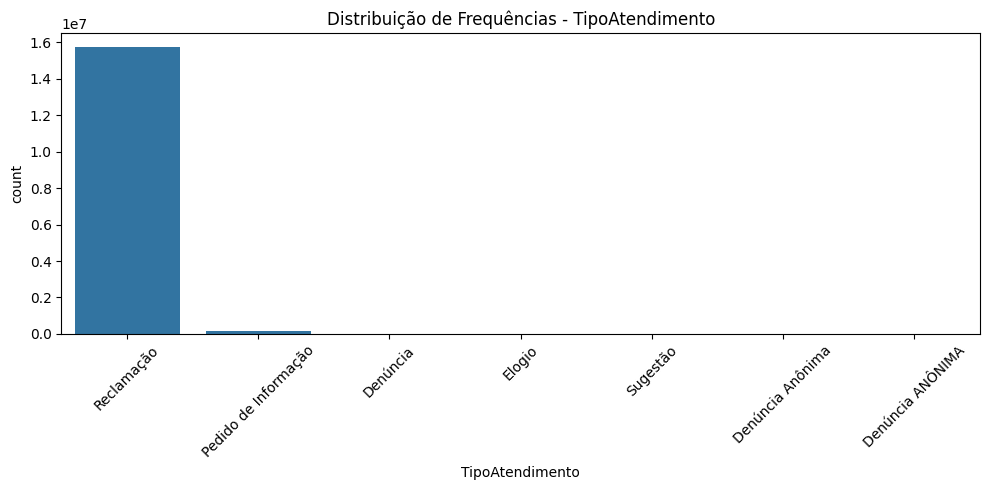

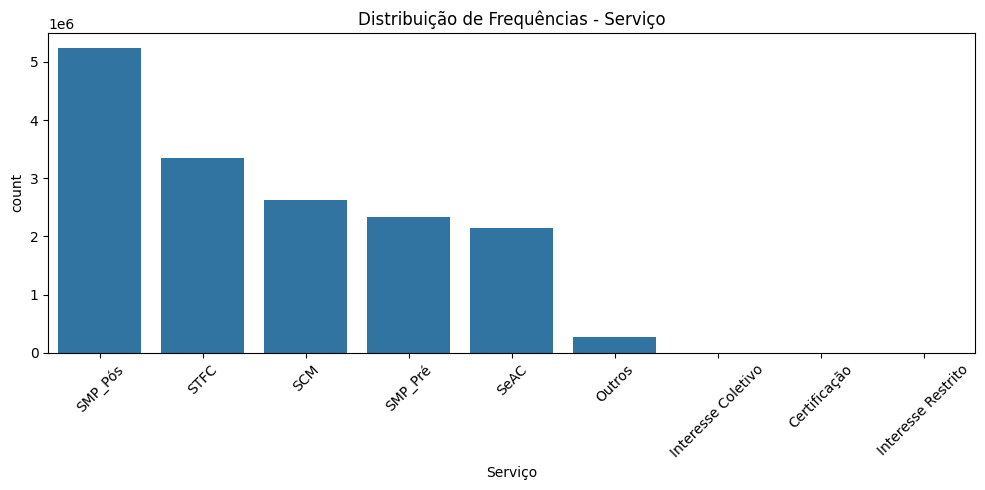

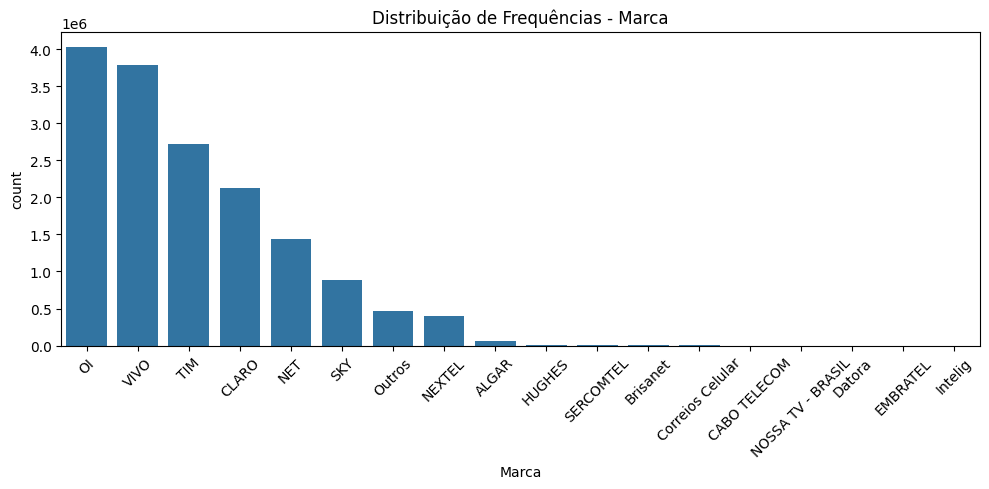

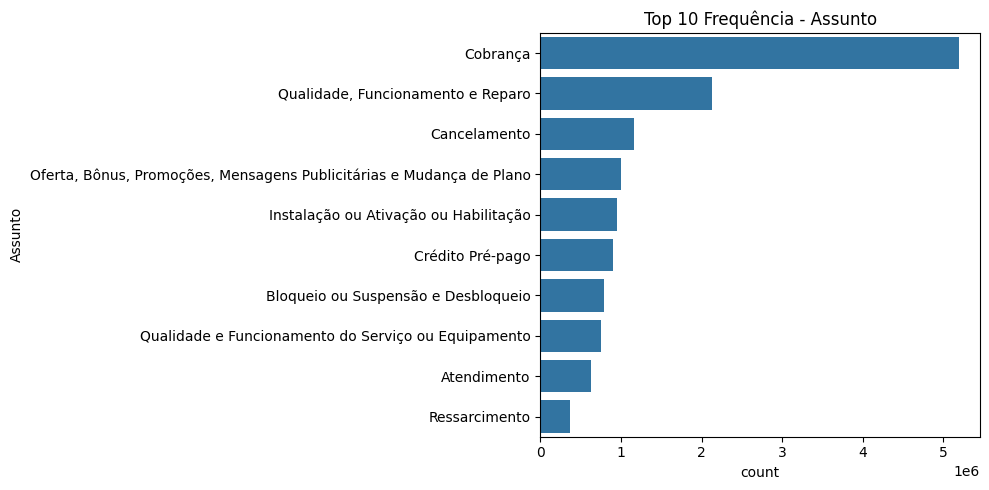

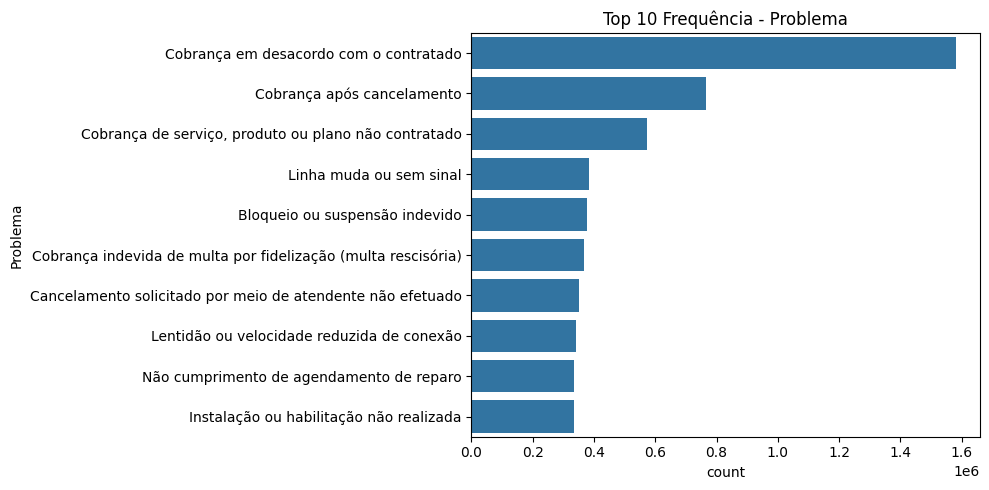

In [24]:
# 6. Frequências de variáveis categóricas
for col in colunas_categoricas:
    if col in ['Assunto', 'Problema','Cidade']:
        plt.figure(figsize=(10,5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().iloc[:10].index)
        plt.title(f'Top 10 Frequência - {col}')
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribuição de Frequências - {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


<h3>7) Análise bivariada entre duas variáveis categóricas (exemplo com UF e Serviço, se existirem)


Tabela Cruzada UF x Serviço:
Serviço  Certificação  Interesse Coletivo  Interesse Restrito  Outros     SCM  \
UF                                                                              
AC                  1                   3                   0     294    3800   
AL                  2                   4                   0    1464    9275   
AM                  5                  13                   0    1813   26326   
AP                  0                   2                   0     366    3862   
BA                 46                  42                   4   12277  153992   
CE                 20                  22                  12    7193   63788   
DF                  7                  22                   4   16310   59585   
ES                  5                  17                   6    4348   50020   
GO                 20                  31                   1    7085  106282   
MA                  5                  10                   1    2217   40332  

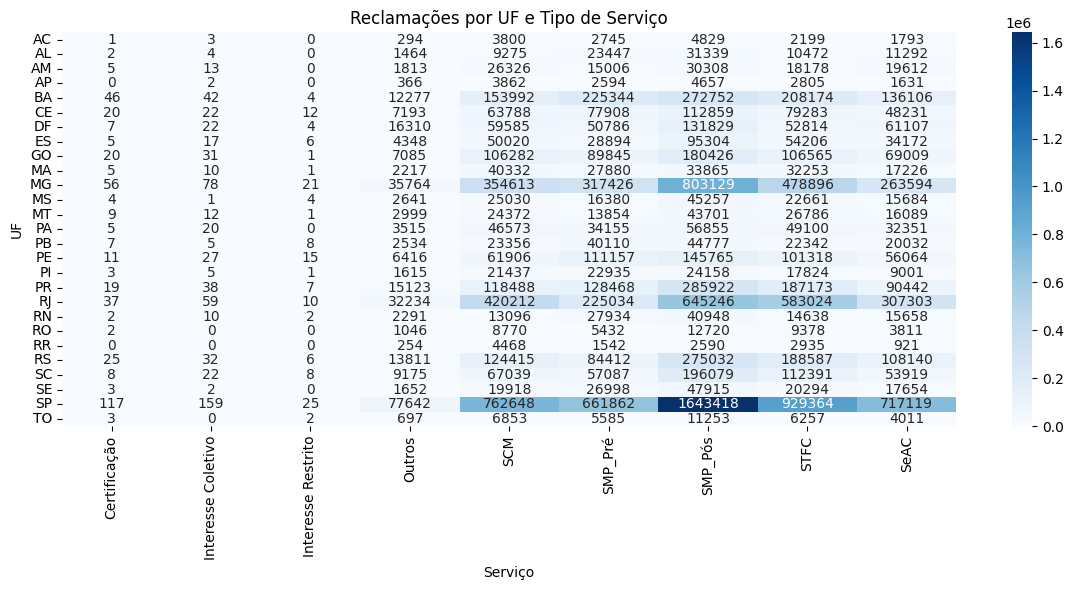

In [25]:
if {'UF', 'Serviço'}.issubset(df.columns):
    crosstab = pd.crosstab(df['UF'], df['Serviço'])
    print("\nTabela Cruzada UF x Serviço:")
    print(crosstab)

    plt.figure(figsize=(12,6))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Reclamações por UF e Tipo de Serviço')
    plt.xlabel('Serviço')
    plt.ylabel('UF')
    plt.tight_layout()
    plt.show()


<h3>8) Teste chi-quadrado (associação entre UF e Serviço)

In [26]:
if {'UF', 'Serviço'}.issubset(df.columns):
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print("\nResultado do Teste Qui-Quadrado:")
    print(f"Chi2: {chi2:.2f}, p-valor: {p:.4f}")
    if p < 0.05:
        print("Há associação significativa entre Estado e Tipo de Serviço.")
    else:
        print("Não há associação significativa entre Estado e Tipo de Serviço.")


Resultado do Teste Qui-Quadrado:
Chi2: 383695.74, p-valor: 0.0000
Há associação significativa entre Estado e Tipo de Serviço.
